# Basics > Means > Single Mean

<div class="alert alert-info">Compare a single mean to the mean value in the population</div>

The single mean (or one-sample) t-test is used to compare the mean of a variable in a sample of data to a (hypothesized) mean in the population from which our sample data are drawn. This is important because we seldom have access to data for an entire population. The hypothesized value in the population is specified in the `Comparison value` box.

We can perform either a one-sided test (i.e., `less than` or `greater than`) or a two-sided test (see the `Alternative hypothesis` dropdown). We use one-sided tests to evaluate if the available data provide evidence that the sample mean is larger (or smaller) than the comparison value (i.e., the population value in the null-hypothesis).

In [1]:
import matplotlib as mpl
import pyrsm as rsm

# increase plot resolution
mpl.rcParams["figure.dpi"] = 100


In [2]:
## setup pyrsm for autoreload
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

# Example

We have access to data from a random sample of grocery stores in the UK. Management will consider entering this market if consumer demand for the product category exceeds 100M units, or, approximately, 1750 units per store. The average demand per store in the sample is equal to 1953. While this number is larger than 1750 we need to determine if the difference could be attributed to sampling error.

You can find the information on unit sales in each of the sample stores in the **demand_uk.rda** data set. The data set contains two variables, `store_id` and `demand_uk`. Our null-hypothesis is that the average store demand in the UK is equal to 1750 unit so we enter that number into the `Comparison value` box. We choose the `Greater than` option from the `Alternative hypothesis` drop-down because we want to determine if the available data provides sufficient evidence to reject the null-hypothesis favor of the alternative that average store demand in the UK is **larger than 1750**.

In [3]:
# load example data from the pyrsm library
demand_uk, demand_uk_description = rsm.load_data(pkg="basics", name="demand_uk")
demand_uk


,id,demand
store 38973,3386,3615
store 55141,2766,780
store 20280,2559,1780
store 26784,3545,2716
store 37018,3189,1126
...,...,...
store 42171,2741,2143
store 31868,2932,2801
store 24006,3028,918
store 33378,3968,3612


In [4]:
# format the data description
rsm.md(demand_uk_description)


## Demand in the UK

### Description

We have access to data from a random sample of grocery stores in the UK. The data includes information on unit sales in a category during one month in each store in a store panel in the UK. The data set contains one variable, 'demand_uk'. 

### Variables

A data frame with 572 observations on 2 variable

* id = Store identifier
* demand_uk = Total category sales in units per store

In [5]:
# perform pyrsm single-mean analysis
sm = rsm.basics.single_mean({"demand_uk": demand_uk}, "demand", "greater", 0.95, 1750)
sm.summary()


Single mean test
Data      : demand_uk
Variables : demand
Confidence: 0.95
Comparison: 1750

Null hyp. : the mean of demand is equal to 1750
Alt. hyp. : the mean of demand is greater than 1750

    mean   n  n_missing      sd     se     me
1953.393 572          0 815.266 34.088 66.953
   diff     se  t.value p.value  df     5.0%  100%    
203.393 34.088    5.967  < .001 571 1897.233   inf ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


The first two blocks of output show basic information about the test (e.g.,. the null and alternative hypothesis) and summary statistics (e.g., mean, standard deviation, standard error, margin or error, etc.). The final row of output shows the following:

- `diff` is the difference between the sample mean (1953.393) and the comparison value (1750)
- `se` is the standard error (i.e., the standard deviation of the sampling distribution of `diff`)
- `t.value` is the t statistic associated with `diff` that we can compare to a t-distribution (i.e., `diff / se`)
- `p.value` is the probability of finding a value as extreme or more extreme than `diff` if the null hypothesis is true
- `df` is the degrees of freedom associated with the statistical test (i.e., *n - 1*)
- `5% 100%` show the 95% confidence interval around the sample mean (1897 to Inf.). These numbers provide a range within which the true population mean is likely to fall

# Testing

There are three approaches we can use to evaluate the null hypothesis. We will choose a significance level of 0.05.1 Of course, each approach will lead to the same conclusion.

### p.value

Because the p.value is **smaller** than the conventional significance level (i.e., 0.05) we reject the null hypothesis and suggest that management should enter the UK market. Note also the ’***’ that are used as an indicator for significance.

### confidence interval

Because the `comparison value` is **not** contained in the confidence interval we reject the null hypothesis and suggest that management should enter the UK market.

### t.value

Because the calculated t.value (5.967) is **larger** than the *critical t.value* we reject the null hypothesis and suggest that management should enter the UK market. We can obtain the critical t.value by using the probability calculator in the *Basics menu*. For a t-distribution with 571 degrees of freedom (see `df`) the critical t.value is 1.648. We have to enter 0.95 as the upper probability bound (i.e., 1 - 0.05) because the alternative hypothesis is `Greater than`.

Probability calculator
Distribution: t
Df          : 571
Mean        : 0
St. dev     : 1.004
Lower bound : 0
Upper bound : 0.95

P(X < 1.648) = 0.95
P(X > 1.648) = 0.05


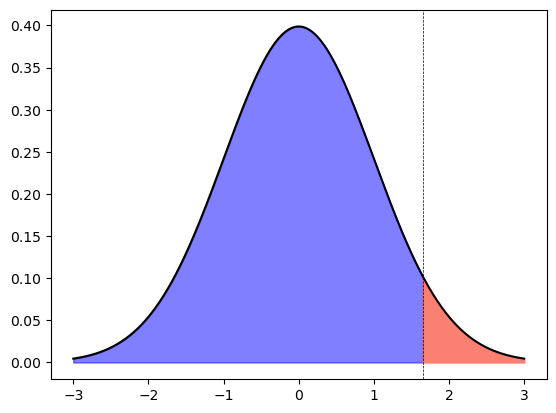

In [6]:
pc = rsm.basics.prob_calc("tdist", df=571,  pub=0.95)
pc.summary()
pc.plot()


In addition to the numerical output provided in the Summary tab we can visualize the data in the Plot tab. The settings in the side-panel are the same as before. The black lines in the histogram show the sample mean (solid) and the confidence interval around the sample mean (dashed). The red line shows the comparison value (i.e., unit sales under the null-hypothesis). Because the red line does not fall within the confidence interval (1897 to Inf.) we reject the null-hypothesis in favor of the alternative.

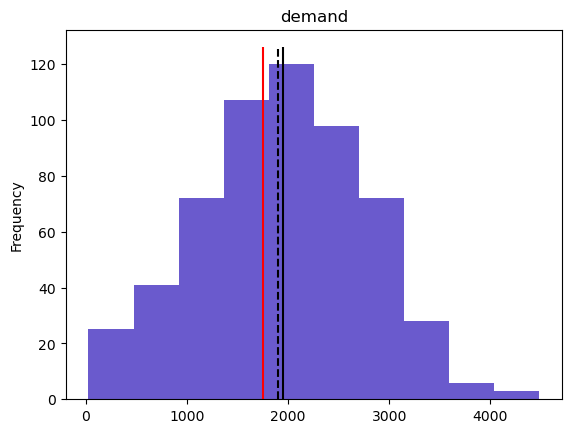

In [7]:
sm.plot("hist")


In [8]:
sm.plot("sim")


Plot type not available yet


# Radiant for Python App: Single Mean

Now lets re-run the analysis using a web-based user interface. Select the `demand` variable for the `Data` and `y` variables, and enter 1750 for the `Comparison value`. The `Alternative hypothesis` is should be set to `Greater than`.


These steps will generate the same output as shown above and will generate the required Python code to create the desired results.

> Note: The app will continue running until you press the `Stop` button in the app navigation bar or the stop button next to the notebook cell

In [9]:
rsm.radiant.single_mean(
    {"demand_uk": demand_uk}, {"demand_uk": demand_uk_description}, code=True
)


Listening on http://0.0.0.0:8000
Pyrsm and Radiant are open source tools and free to use. If you
are a student or instructor using pyrsm or Radiant for a class,
as a favor to the developers, please send an email to
<radiant@rady.ucsd.edu> with the name of the school and class.
If you are using Radiant in your company, as a favor to the
developer, please share the name of your company and what types
of activites you are supporting with the tool.


```python
import pyrsm as rsm

# demand_uk = pd.read_parquet('demand_uk.parquet')
sm = rsm.basics.single_mean(
    data={"demand_uk": demand_uk}, var="demand", alt_hyp="greater", comp_value=1750
)
sm.summary()

```

<p align="center"><img src="figures_basics/single_mean_summary.png"></p>

# Stats Speak

This is a **single mean** test of the null hypothesis that the true population **mean** is equal to **1750**. Using a significance level of 0.05, we reject the null hypothesis, and conclude that the true population **mean** is **larger** than **1750**.

The p.value for this test is **< .001**. This is the probability of observing a sample **mean** that is as or more extreme than the sample **mean** from the data if the null hypothesis is true. In this case, it is the probability of observing a sample **mean** that is larger than (or equal to) **1953.393** if the true population **mean** is **1750**.

The 5% confidence bound is **1897.233**. If repeated samples were taken and the 5% confidence bound computed for each one, the true population mean would exceed the lower bound in 95% of the samples

The **significance level**, often denoted by α, is the highest probability you are willing to accept of rejecting the null hypothesis when it is actually true. A commonly used significance level is 0.05 (or 5%)

1−α is called the **confidence level**. A commonly used confidence level is 0.95 (or 95%)

# Video Tutorials

To review the same analysis in Radiant-for-R, copy-and-paste the full command below into the RStudio console (i.e., the bottom-left window) and press return to gain access to all materials used in the hypothesis testing module of the <a href="https://www.youtube.com/playlist?list=PLNhtaetb48EdKRIY7MewCyvb_1x7dV3xw">Radiant Tutorial Series</a>:

`usethis::use_course("https://www.dropbox.com/sh/0xvhyolgcvox685/AADSppNSIocrJS-BqZXhD1Kna?dl=1")`

<a href="https://www.youtube.com/watch?v=QV1qA5RPzlY" target="_blank">Single Mean Hypothesis Test</a>

* This video shows how to test a hypothesis about a single sample mean versus a population mean
* Topics List:
    - Calculate summary statistics for a sample
    - Setup a hypothesis test for a single mean in Radiant
    - Use the p.value, confidence interval, or critical value to evaluate the hypothesis test

© Vincent Nijs (2023)